In [68]:
import pandas as pd
%matplotlib inline
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cross_validation import train_test_split
from sklearn import linear_model
from sklearn import svm
from sklearn.preprocessing import Imputer
from sklearn import metrics
import numpy as np
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [6]:
fulldata = pd.read_csv("collegedata_normalized.csv")
fulldata.head(10)

,Unnamed: 0,studentID,classrank,admissionstest,AP,averageAP,SATsubject,GPA,GPA_w,program,...,alumni,outofstate,acceptStatus,acceptProb,name,acceptrate,size,public,finAidPct,instatePct
0,0,PWY05BUB4I,NaN,0.111013,7,0.187427,0.070643,-0.013895,0.005109,Biomedical engineering,...,-1,-1,1,NaN,Rice,0.151,6621,-1,0,0
1,1,3UVDFVI9Z0,NaN,0.035099,7,0.115998,-0.096024,0.036646,0.033998,Classics,...,-1,1,1,NaN,Rice,0.151,6621,-1,0,0
2,2,BCCBHJUP0M,NaN,0.035099,0,NaN,0.070643,0.029426,-0.088225,Biological Science,...,-1,1,-1,NaN,Rice,0.151,6621,-1,0,0
3,3,WZFPWHSQMS,NaN,0.166223,7,0.151713,0.237310,0.007765,-0.032669,Physics,...,-1,1,-1,NaN,Rice,0.151,6621,-1,0,0
4,4,5W1JNQA7G0,NaN,0.048901,1,-0.062573,-0.096024,0.040256,NaN,NaN,...,-1,1,1,NaN,Rice,0.151,6621,-1,0,0
5,5,TWUKL79B6V,NaN,0.048901,0,NaN,-0.096024,0.058307,NaN,Political Science,...,-1,1,0,NaN,Rice,0.151,6621,-1,0,0
6,6,1OJUGUL4LL,NaN,0.097210,0,NaN,-0.096024,0.022206,0.018442,Computer Science,...,-1,1,-1,NaN,Rice,0.151,6621,-1,0,0
7,7,NX2TARIB0P,NaN,-0.296164,3,-0.145906,-0.096024,-0.049996,-0.026002,NaN,...,-1,1,-1,NaN,Rice,0.151,6621,-1,0,0
8,8,N4Y1IOID8K,NaN,0.007493,7,-0.062573,-0.429357,0.036646,-0.083780,Business,...,-1,-1,-1,NaN,Rice,0.151,6621,-1,0,0
9,9,911MU875UY,NaN,-0.006309,4,-0.000073,-0.096024,0.058307,0.151775,Computer Science,...,-1,1,1,NaN,Rice,0.151,6621,-1,0,0


Time to ask some questions of our data! 


I'm interested in figuring out how private vs public education affects admission. Let's explore.

In [46]:
partialdata = fulldata[fulldata.schooltype!=0]
byschooltype = partialdata.groupby('schooltype')
byschooltype.describe()

AP           GPA         GPA_w  MinorityGender  \
schooltype                                                                   
-1         count  12153.000000  12153.000000  10212.000000    12153.000000   
           mean       3.538962      0.002781      0.007039       -0.980581   
           std        2.232455      0.072676      0.084147        0.196123   
           min        0.000000     -0.941693     -0.848225       -1.000000   
           25%        2.000000     -0.017505     -0.048225       -1.000000   
           50%        3.000000      0.022206      0.002886       -1.000000   
           75%        5.000000      0.058307      0.065109       -1.000000   
           max        7.000000      0.058307      0.151775        1.000000   
 1         count   3563.000000   3563.000000   2482.000000     3563.000000   
           mean       2.665450     -0.009334     -0.027568       -0.990457   
           std        2.303551      0.078977      0.084076        0.137838   
           min        0.000000     -0.501260     -0.514891       -1.000000   
           25%        0.000000     -0.049996     -0.070447       -1.000000   
           50%        2.000000      0.014986     -0.026002       -1.000000   
           75%        4.000000      0.058307      0.020664       -1.000000   
           max        7.000000      0.058307      0.151775        1.000000   

                  MinorityRace    SATsubject    Unnamed: 0  acceptProb  \
schooltype                                                               
-1         count  12153.000000  12153.000000  12153.000000           0   
           mean      -0.660331      0.003321   7970.712252         NaN   
           std        0.751006      0.214499   4609.849907         NaN   
           min       -1.000000     -0.429357      0.000000         NaN   
           25%       -1.000000     -0.096024   4018.000000         NaN   
           50%       -1.000000      0.070643   7919.000000         NaN   
           75%       -1.000000      0.070643  11969.000000         NaN   
           max        1.000000      0.570643  16060.000000         NaN   
 1         count   3563.000000   3563.000000   3563.000000           0   
           mean      -0.618861     -0.006212   8217.900365         NaN   
           std        0.785611      0.227647   4720.739677         NaN   
           min       -1.000000     -0.429357      2.000000         NaN   
           25%       -1.000000     -0.096024   3958.000000         NaN   
           50%       -1.000000      0.070643   8478.000000         NaN   
           75%       -1.000000      0.070643  12397.000000         NaN   
           max        1.000000      0.570643  16061.000000         NaN   

                  acceptStatus    acceptrate   ...     firstinfamily  \
schooltype                                     ...                     
-1         count  12153.000000  12153.000000   ...                 0   
           mean      -0.200444      0.124571   ...               NaN   
           std        0.888803      0.054238   ...               NaN   
           min       -1.000000      0.051000   ...               NaN   
           25%       -1.000000      0.074000   ...               NaN   
           50%       -1.000000      0.115000   ...               NaN   
           75%        1.000000      0.160000   ...               NaN   
           max        1.000000      0.268000   ...               NaN   
 1         count   3563.000000   3563.000000   ...                 0   
           mean      -0.188044      0.124191   ...               NaN   
           std        0.881211      0.053926   ...               NaN   
           min       -1.000000      0.051000   ...               NaN   
           25%       -1.000000      0.074000   ...               NaN   
           50%        0.000000      0.115000   ...               NaN   
           75%        1.000000      0.171000   ...               NaN   
           max        1.000000      0.268000   ...               N

ValueError: setting an array element with a sequence.

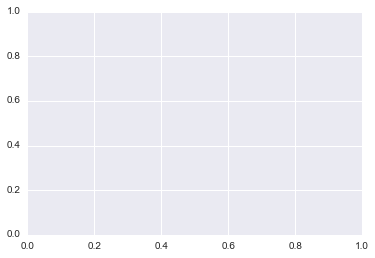

In [70]:
plt.hist(byschooltype.GPA.)
#byschooltype.GPA.plot()



schooltype
-1    Axes(0.125,0.125;0.775x0.775)
 1    Axes(0.125,0.125;0.775x0.775)
Name: GPA, dtype: object

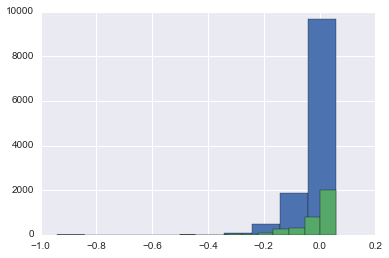

In [54]:
byschooltype.GPA.hist()

In [57]:
np.corrcoef(partialdata.schooltype,partialdata.canAfford)

array([[ 1.        ,  0.04629844],
       [ 0.04629844,  1.        ]])

In [58]:
np.corrcoef(partialdata.schooltype,partialdata.alumni)

array([[ 1.        ,  0.03805005],
       [ 0.03805005,  1.        ]])

In [59]:
np.corrcoef(partialdata.canAfford,partialdata.alumni)

array([[ 1.        ,  0.01425591],
       [ 0.01425591,  1.        ]])

In [63]:
np.corrcoef(fulldata.GPA,fulldata.admissionstest)

array([[ 1.        ,  0.35569146],
       [ 0.35569146,  1.        ]])